In [8]:
%matplotlib inline

In [24]:
import csv
import pandas as pd
import numpy as np
import os
from datetime import datetime
import calendar

import seaborn as sns


from scipy.stats import linregress

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')



In [10]:
# Global declarations
data_path = "..\data"

temp_dataFile = "NaN_Replaced_Temps.csv"
co2_dataFile = "CO2_GlobalSummary.csv"
aer_dataFile = "AER_GlobalSummary.csv"
tsi_dataFile = "TSI_MonthlyAvg.csv"

#Output folders
result_dir = "..\output"
image_dir = "..\images"

# Plot Style to use
#mpl.style.use('seaborn')
sns.set(style="ticks")

# - Month_num to Month Name mapping
month_num = dict((v,k) for k,v in enumerate(calendar.month_abbr))

month_name = list(v for k,v in enumerate(calendar.month_abbr))


### Ready Temperature dataframe to merge with other variables

In [11]:
#read  temp data file
tempDF = pd.read_csv(os.path.join(data_path, temp_dataFile))

# Temporary - Remove once final Temp Data file is ready
if(tempDF.isnull().values.sum() != 0):
    # fill the NA with rowwise means
    rowMeans = tempDF[month_name[1:]].mean(axis = 1)
    tempDF = tempDF.apply(lambda r: r.fillna(rowMeans[r.index]))

# reshape tempDF to have month values in the row
temp_flatDF = pd.melt(tempDF, id_vars =['Country','Year'], var_name = 'Month', value_name = "Monthly_Temp")   

temp_flatDF.head()
 

,Country,Year,Month,Monthly_Temp
0,ALGERIA,1975,Jan,8.9
1,ALGERIA,1976,Jan,8.6
2,ALGERIA,1977,Jan,11.0
3,ALGERIA,1978,Jan,9.1
4,ALGERIA,1979,Jan,13.0


In [12]:
# Group by year and month and aggregate values by mean()

temp_GDF_YM = temp_flatDF.groupby(['Year','Month']).agg(np.mean)

temp_GDF_YM.reset_index(inplace = True)

temp_GDF_YM.head()

,Year,Month,Monthly_Temp
0,1975,Apr,16.607500
1,1975,Aug,20.942917
2,1975,Dec,12.039167
3,1975,Feb,12.323333
4,1975,Jan,12.086667


### Ready CO2 to merge with Temp


In [13]:
#read  CO2  data file
co2DF = pd.read_csv(os.path.join(data_path, co2_dataFile))

if(co2DF.isnull().values.sum() != 0):
    # fill the NA with rowwise means
    rowMeans = co2DF[month_name[1:]].mean(axis = 1)
    co2DF = co2DF.apply(lambda r: r.fillna(rowMeans[r.index]))

# reshape DF to have month values in the row
co2_flatDF = pd.melt(co2DF, id_vars =['Year'], var_name = 'Month', value_name = "Monthly_Co2")   

co2_flatDF.head()

,Year,Month,Monthly_Co2
0,1975,Jan,332.43
1,1976,Jan,332.26
2,1977,Jan,333.94
3,1978,Jan,335.66
4,1979,Jan,337.40


### Ready Aerosol to merge with Temp

In [14]:
#read  AEROSOL  data file
aerDF = pd.read_csv(os.path.join(data_path, aer_dataFile))

if(aerDF.isnull().values.sum() != 0):
    # fill the NA with rowwise means
    rowMeans = aerDF[month_name[1:]].mean(axis = 1)
    aerDF = aerDF.apply(lambda r: r.fillna(rowMeans[r.index]))

# reshape DF to have month values in the row
aer_flatDF = pd.melt(aerDF, id_vars =['Year'], var_name = 'Month', value_name = "Monthly_AER")   

aer_flatDF.head()

,Year,Month,Monthly_AER
0,1975,Jan,795.03
1,1976,Jan,294.08
2,1977,Jan,351.42
3,1978,Jan,365.60
4,1979,Jan,339.98


### Ready TSI data to merge with Temp

In [15]:
#read  AEROSOL  data file
tsiDF = pd.read_csv(os.path.join(data_path, tsi_dataFile))

if(tsiDF.isnull().values.sum() != 0):
    # fill the NA with rowwise means
    rowMeans = tsiDF[month_name[1:]].mean(axis = 1)
    tsiDF = tsiDF.apply(lambda r: r.fillna(rowMeans[r.index]))

# reshape DF to have month values in the row
tsi_flatDF = pd.melt(tsiDF, id_vars =['Year'], var_name = 'Month', value_name = "Monthly_TSI")   

tsi_flatDF.head()

,Year,Month,Monthly_TSI
0,1970,Jan,1361.36
1,1971,Jan,1361.07
2,1972,Jan,1361.26
3,1973,Jan,1360.99
4,1974,Jan,1360.77


### Start Merging : Temp, CO2, AER and TSI

In [17]:
temp_co2 = pd.merge(temp_GDF_YM, co2_flatDF, left_on = ['Year','Month'], right_on = ['Year','Month'], \
                    how = 'inner', suffixes = ['_temp','_co2'])

temp_co2.head()

,Year,Month,Monthly_Temp,Monthly_Co2
0,1975,Apr,16.607500,332.08
1,1975,Aug,20.942917,328.45
2,1975,Dec,12.039167,332.29
3,1975,Feb,12.323333,332.38
4,1975,Jan,12.086667,332.43


In [18]:
temp_2var = pd.merge(temp_co2, aer_flatDF, left_on = ['Year','Month'], right_on = ['Year','Month'], \
                    how = 'inner')

temp_2var.head()

,Year,Month,Monthly_Temp,Monthly_Co2,Monthly_AER
0,1975,Apr,16.607500,332.08,451.73
1,1975,Aug,20.942917,328.45,711.68
2,1975,Dec,12.039167,332.29,629.23
3,1975,Feb,12.323333,332.38,795.03
4,1975,Jan,12.086667,332.43,795.03


In [19]:
temp_3var = pd.merge(temp_2var, tsi_flatDF, left_on = ['Year','Month'], right_on = ['Year','Month'], \
                    how = 'inner')

temp_3var.head()

,Year,Month,Monthly_Temp,Monthly_Co2,Monthly_AER,Monthly_TSI
0,1975,Apr,16.607500,332.08,451.73,1360.80
1,1975,Aug,20.942917,328.45,711.68,1360.51
2,1975,Dec,12.039167,332.29,629.23,1360.74
3,1975,Feb,12.323333,332.38,795.03,1360.64
4,1975,Jan,12.086667,332.43,795.03,1360.66


In [20]:
#Add colums to assist in further analysis
 
#Convert month names to month number
temp_3var['Month_Num'] = temp_3var['Month'].apply(lambda r: month_num[r] )

# Add Date column, example 01-Jan-1975
temp_3var['Date'] = temp_3var['Year'].astype(str)+'-'+temp_3var['Month_Num'].astype(str)+'-01'
temp_3var['Date'] = temp_3var['Date'].apply(lambda r: datetime.strptime(r , '%Y-%m-%d'))

#Sort Data Frame by Year and MOnth
temp_3var.sort_values(by = ['Year','Month_Num'])

temp_3var.head()

,Year,Month,Monthly_Temp,Monthly_Co2,Monthly_AER,Monthly_TSI,Month_Num,Date
0,1975,Apr,16.607500,332.08,451.73,1360.80,4,1975-04-01
1,1975,Aug,20.942917,328.45,711.68,1360.51,8,1975-08-01
2,1975,Dec,12.039167,332.29,629.23,1360.74,12,1975-12-01
3,1975,Feb,12.323333,332.38,795.03,1360.64,2,1975-02-01
4,1975,Jan,12.086667,332.43,795.03,1360.66,1,1975-01-01


## START ANALYSIS

### Use df.corr() to understand correlation between Temp and CO2

In [47]:
temp_co2_GDF = temp_co2[['Year','Monthly_Temp','Monthly_Co2']].groupby('Year').agg(np.mean)
temp_co2_GDF.head()

,Monthly_Temp,Monthly_Co2
Year,,
1975,16.579987,331.180000
1976,16.183403,331.879167
1977,16.635145,333.806667
1978,16.402431,335.386667
1979,16.601778,337.192500


In [21]:
temp_3var_GDF = temp_3var[['Year','Monthly_Temp','Monthly_Co2','Monthly_AER','Monthly_TSI']].groupby('Year').agg(np.mean)
temp_3var_GDF.head()

,Monthly_Temp,Monthly_Co2,Monthly_AER,Monthly_TSI
Year,,,,
1975,16.578437,331.180000,795.030000,1360.715000
1976,16.183403,331.879167,553.450000,1360.694167
1977,16.634201,333.806667,351.295833,1360.889167
1978,16.402431,335.386667,319.229167,1361.213333
1979,16.594826,337.192500,348.967500,1361.600000


In [28]:
corrDF = temp_3var_GDF.corr()
corrDF

,Monthly_Temp,Monthly_Co2,Monthly_AER,Monthly_TSI
Monthly_Temp,1.000000,0.921717,0.546505,0.020691
Monthly_Co2,0.921717,1.000000,0.440049,-0.110602
Monthly_AER,0.546505,0.440049,1.000000,-0.125403
Monthly_TSI,0.020691,-0.110602,-0.125403,1.000000


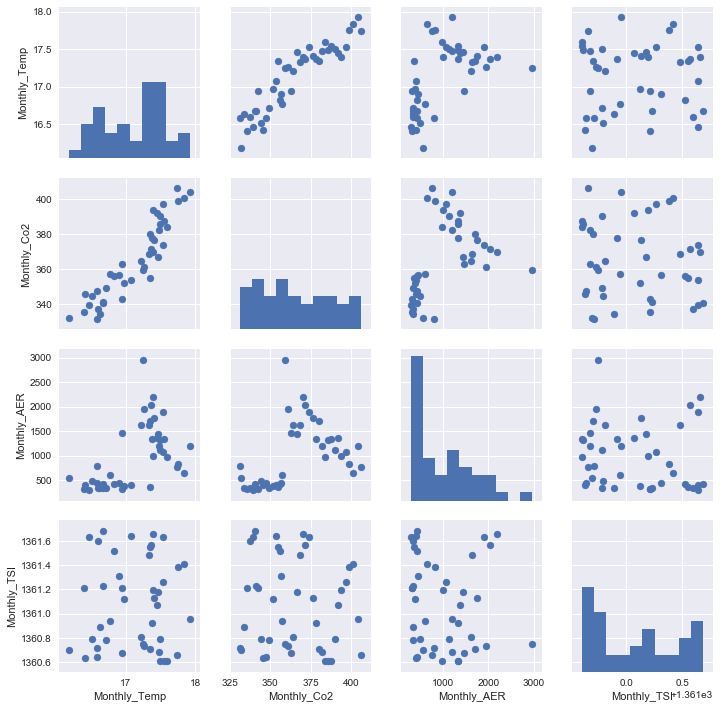

In [29]:
g = sns.PairGrid(temp_3var_GDF, hue )
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)